In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_csv("Datasets/Chicago_Beach_Water_Quality/data.csv")
data

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Montrose Beach,08/30/2013 08:00:00 AM,20.3,1.18,0.891,0.080,3.0,9.4,8/30/2013 8:00 AM,MontroseBeach201308300800
1,Ohio Street Beach,05/26/2016 01:00:00 PM,14.4,1.23,NaN,0.111,4.0,12.4,05/26/2016 1:00 PM,OhioStreetBeach201605261300
2,Calumet Beach,09/03/2013 04:00:00 PM,23.2,3.63,1.201,0.174,6.0,9.4,9/3/2013 4:00 PM,CalumetBeach201309031600
3,Calumet Beach,05/28/2014 12:00:00 PM,16.2,1.26,1.514,0.147,4.0,11.7,5/28/2014 12:00 PM,CalumetBeach201405281200
4,Montrose Beach,05/28/2014 12:00:00 PM,14.4,3.36,1.388,0.298,4.0,11.9,5/28/2014 12:00 PM,MontroseBeach201405281200
...,...,...,...,...,...,...,...,...,...,...
34918,Ohio Street Beach,09/12/2017 12:00:00 PM,19.9,2.61,NaN,0.187,3.0,10.5,09/12/2017 12:00 PM,OhioStreetBeach201709121200
34919,Ohio Street Beach,09/12/2017 01:00:00 PM,19.8,0.00,NaN,0.187,3.0,10.5,09/12/2017 1:00 PM,OhioStreetBeach201709121300
34920,Ohio Street Beach,09/12/2017 03:00:00 PM,22.3,0.00,NaN,0.187,3.0,10.5,09/12/2017 3:00 PM,OhioStreetBeach201709121500
34921,Ohio Street Beach,09/12/2017 05:00:00 PM,21.1,26.97,NaN,0.187,3.0,9.4,09/12/2017 5:00 PM,OhioStreetBeach201709121700


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34923 entries, 0 to 34922
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Beach Name                   34923 non-null  object 
 1   Measurement Timestamp        34917 non-null  object 
 2   Water Temperature            34917 non-null  float64
 3   Turbidity                    34917 non-null  float64
 4   Transducer Depth             10034 non-null  float64
 5   Wave Height                  34690 non-null  float64
 6   Wave Period                  34690 non-null  float64
 7   Battery Life                 34917 non-null  float64
 8   Measurement Timestamp Label  34917 non-null  object 
 9   Measurement ID               34923 non-null  object 
dtypes: float64(6), object(4)
memory usage: 2.7+ MB


# After using the isnull() command there are 24889 values messing in Transducer Depth which is too much which will obiously effect the Analysing process. So i will be removing that particular Column.

In [50]:
data.isnull().sum()

Beach Name                         0
Measurement Timestamp              6
Water Temperature                  6
Turbidity                          6
Transducer Depth               24889
Wave Height                      233
Wave Period                      233
Battery Life                       6
Measurement Timestamp Label        6
Measurement ID                     0
dtype: int64

In [51]:
data = data.drop(columns=["Transducer Depth"])

In [52]:
data.describe()

,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
count,34917.000000,34917.000000,34690.000000,34690.000000,34917.000000
mean,19.363387,4.823575,-1516.116166,-1512.482041,11.038205
std,3.356908,33.506600,12220.244835,12220.696864,0.771769
min,0.000000,0.000000,-99999.992000,-100000.000000,4.800000
25%,17.100000,0.660000,0.110000,3.000000,10.600000
50%,19.600000,1.260000,0.154000,3.000000,11.000000
75%,22.000000,2.540000,0.201000,4.000000,11.500000
max,31.500000,1683.480000,1.467000,10.000000,13.300000


# Accoring to the ```data.describe()``` function Turbidity has very unbalance data so i will be taking only that data in which **Turbidity** is less than 1000 values so that data can became more Balance

In [53]:
data = data[data["Turbidity"] > 1000]
data

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
7547,63rd Street Beach,07/27/2014 02:00:00 PM,18.9,1683.48,NaN,NaN,5.3,07/27/2014 2:00 PM,63rdStreetBeach201407271400
7784,63rd Street Beach,07/27/2014 10:00:00 PM,17.7,1680.92,NaN,NaN,5.3,07/27/2014 10:00 PM,63rdStreetBeach201407272200
8908,63rd Street Beach,08/04/2014 07:00:00 PM,22.0,1683.48,NaN,NaN,5.7,08/04/2014 7:00 PM,63rdStreetBeach201408041900
9468,Ohio Street Beach,08/09/2014 05:00:00 AM,22.3,1113.50,0.199,4.0,10.6,08/09/2014 5:00 AM,OhioStreetBeach201408090500
10070,Ohio Street Beach,08/13/2014 11:00:00 PM,22.4,1190.02,0.188,4.0,10.4,08/13/2014 11:00 PM,OhioStreetBeach201408132300
18703,Ohio Street Beach,07/24/2016 12:00:00 AM,20.9,1074.05,-99999.992,-100000.0,10.8,07/24/2016 12:00 AM,OhioStreetBeach201607242400
30186,Rainbow Beach,09/30/2015 07:00:00 PM,9.8,1362.80,-99999.992,-100000.0,10.5,09/30/2015 7:00 PM,RainbowBeach201509301900


# Transforming the **Measurement Timestamp** Column so that it could be easy for us to analysis the data.

In [54]:
data['Measurement Timestamp'] = pd.to_datetime(data['Measurement Timestamp'])
data.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
7547,63rd Street Beach,2014-07-27 14:00:00,18.9,1683.48,NaN,NaN,5.3,07/27/2014 2:00 PM,63rdStreetBeach201407271400
7784,63rd Street Beach,2014-07-27 22:00:00,17.7,1680.92,NaN,NaN,5.3,07/27/2014 10:00 PM,63rdStreetBeach201407272200
8908,63rd Street Beach,2014-08-04 19:00:00,22.0,1683.48,NaN,NaN,5.7,08/04/2014 7:00 PM,63rdStreetBeach201408041900
9468,Ohio Street Beach,2014-08-09 05:00:00,22.3,1113.50,0.199,4.0,10.6,08/09/2014 5:00 AM,OhioStreetBeach201408090500
10070,Ohio Street Beach,2014-08-13 23:00:00,22.4,1190.02,0.188,4.0,10.4,08/13/2014 11:00 PM,OhioStreetBeach201408132300


# Seperating Date and Month from Measurement Timestamp so that we can analysis data in more efficient way.

In [55]:
data['Year'] = data['Measurement Timestamp'].apply(lambda x:x.year)
data['Month'] = data['Measurement Timestamp'].apply(lambda x:x.month)
data = data.astype({'Year':int,'Month':int})
data.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID,Year,Month
7547,63rd Street Beach,2014-07-27 14:00:00,18.9,1683.48,NaN,NaN,5.3,07/27/2014 2:00 PM,63rdStreetBeach201407271400,2014,7
7784,63rd Street Beach,2014-07-27 22:00:00,17.7,1680.92,NaN,NaN,5.3,07/27/2014 10:00 PM,63rdStreetBeach201407272200,2014,7
8908,63rd Street Beach,2014-08-04 19:00:00,22.0,1683.48,NaN,NaN,5.7,08/04/2014 7:00 PM,63rdStreetBeach201408041900,2014,8
9468,Ohio Street Beach,2014-08-09 05:00:00,22.3,1113.50,0.199,4.0,10.6,08/09/2014 5:00 AM,OhioStreetBeach201408090500,2014,8
10070,Ohio Street Beach,2014-08-13 23:00:00,22.4,1190.02,0.188,4.0,10.4,08/13/2014 11:00 PM,OhioStreetBeach201408132300,2014,8


# Droping all the existing Null Values

In [56]:
data = data.dropna()

# Analysing The Data

In [61]:
grouping1 = data.groupby(by=["Year", "Month"]).mean()
grouping1

,,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
Year,Month,,,,,
2014,8,22.35,1151.76,0.1935,4.0,10.5
2015,9,9.80,1362.80,-99999.9920,-100000.0,10.5
2016,7,20.90,1074.05,-99999.9920,-100000.0,10.8


Text(0.5, 1.0, 'Mean water temprature by year and month')

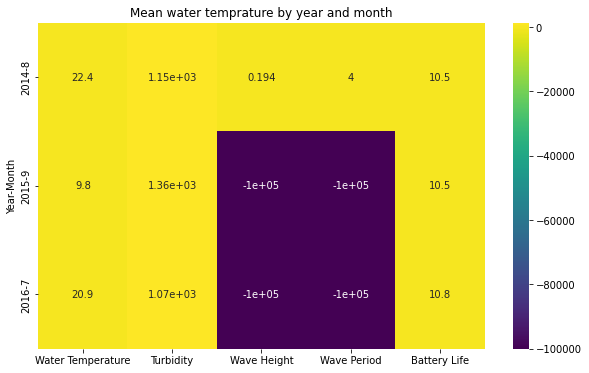

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(grouping1,cmap='viridis',annot=True,fmt='.3g')
plt.title('Mean Values by year and month')

# I dont Know exactly i am correct or not, What what i exactly feel is this dataset is not balanced so for me i am having trouble in finding insides and analysing the data or it may also be i dont have knowledge in this perticular Domain.

# **Thanku**